In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Starbucks Modelling

In [2]:
starbucks_only = pd.read_csv('data_exploration/full_us_data.csv').drop(columns='Unnamed: 0')

In [3]:
starbucks_only['% Bachelors+ Change'] = [np.nan if np.isinf(i) else i for i in starbucks_only['% Bachelors+ Change']]
starbucks_only['% Bachelors+ Change'] = starbucks_only['% Bachelors+ Change'].fillna(starbucks_only['% Bachelors+ Change'].mean())

In [4]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

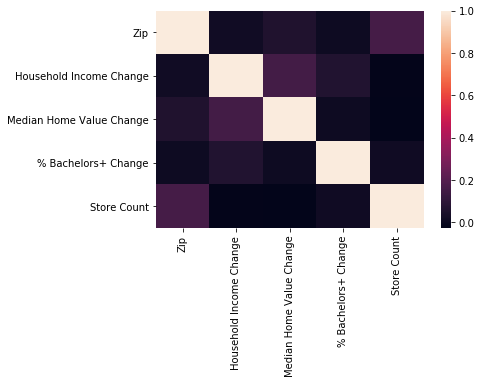

In [5]:
sns.heatmap(starbucks_only.corr())

### Multiple Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.linear_model import LinearRegression
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [8]:
yhat = multi.predict(X_test)

In [9]:
sb_multi = multi.score(X_test, y_test)

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = multi, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 0.08 %
Standard Deviation: 0.09 %


### Support Vector Regression

In [11]:
y = y.reshape(len(y), 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [14]:
sb_svr = svr.score(X_test, y_test)

In [15]:
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-v

Accuracy: -5.48 %
Standard Deviation: 0.54 %


### Decision Tree Regression

In [16]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [18]:
y = y.reshape(len(y), 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
yhat = tree.predict(X_test)

In [22]:
sb_tree = tree.score(X_test, y_test)

In [23]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -84.23 %
Standard Deviation: 20.05 %


### Random Forest Regressor

In [24]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [25]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10)

In [28]:
yhat = rf.predict(X_test)

In [29]:
sb_rf = rf.score(X_test, y_test)

In [30]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anacon

Accuracy: -5.21 %
Standard Deviation: 3.60 %


# Walmart Modelling

In [31]:
walmart_only = pd.read_csv('data_exploration/walmart_full_us_data.csv').drop(columns='Unnamed: 0')

In [32]:
walmart_only['% Bachelors+ Change'] = [np.nan if np.isinf(i) else i for i in walmart_only['% Bachelors+ Change']]
walmart_only['% Bachelors+ Change'] = walmart_only['% Bachelors+ Change'].fillna(walmart_only['% Bachelors+ Change'].mean())

In [33]:
walmart_only

,Zip,Household Income Change,Median Home Value Change,% Bachelors+ Change,Walmart Store Count
0,601,-0.016970,-0.164729,0.009724,0.0
1,602,0.094400,-0.033595,-0.000766,0.0
2,603,0.150031,0.048843,-0.059337,0.0
3,606,0.150336,-0.093069,0.118375,0.0
4,610,0.179752,-0.190128,-0.007150,0.0
...,...,...,...,...,...
33115,99923,1.146597,0.796516,-0.805195,0.0
33116,99925,0.330435,0.061436,0.224762,0.0
33117,99926,0.181197,0.415430,0.108814,0.0
33118,99927,2.346643,1.201131,-0.432836,0.0


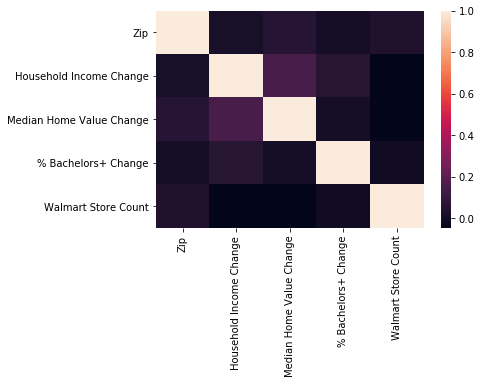

In [34]:
sns.heatmap(walmart_only.corr())

### Multiple Linear Regressor

In [35]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [38]:
wm_multi = multi.score(X_test, y_test)

In [39]:
accuracies = cross_val_score(estimator = multi, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 0.34 %
Standard Deviation: 0.13 %


### Support Vector Regression

In [40]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

In [41]:
y = y.reshape(len(y), 1)

In [42]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [45]:
wm_svr = svr.score(X_test, y_test)

In [46]:
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-v

Accuracy: -6.63 %
Standard Deviation: 0.89 %


### Decision Tree Regression

In [47]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [48]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
wm_tree = tree.score(X_test, y_test)

In [52]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -84.28 %
Standard Deviation: 4.58 %


### Random Forest Regressor

In [53]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [54]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=10)

In [57]:
wm_rf = rf.score(X_test, y_test)

In [58]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anacon

Accuracy: -6.68 %
Standard Deviation: 3.70 %


# Comparing models across datasets

In [59]:
sb_match = [sb_multi, sb_svr, sb_tree, sb_rf]
wm_match = [wm_multi, wm_svr, wm_tree, wm_rf]
models = ['Multiple Regression', 'SVR', 'Decision Tree Regression', 'Random Forest Regression']

In [62]:
compare_full = pd.DataFrame()
compare_full['Model Type'] = models
compare_full['Starbucks - Full US'] = sb_match
compare_full['Walmart - Full US'] = wm_match

In [64]:
compare_full.to_csv('full_us_compare.csv')